# Linear regression

## Using Normal Equation and SVD approaches.

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100, 1)

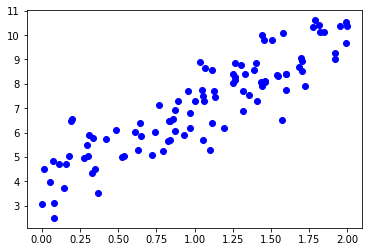

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, y, "bo")
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.96627942],
       [3.05207192]])

In [5]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.96627942],
       [10.07042326]])

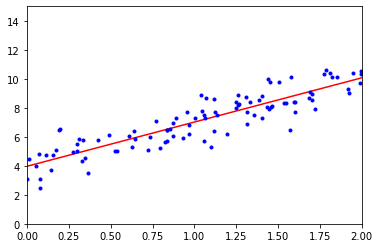

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.96627942] [[3.05207192]]
[[ 3.96627942]
 [10.07042326]]


In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.96627942],
       [3.05207192]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.96627942],
       [3.05207192]])

# NE and SVD get very slow when the number of features grows lagre(100k)
# the O(n) of inverting matrix is about 2.4 ~ 3
# Looking other way to train LinearRegression, which is better suited when number of features are large

## --------------------------------
# Gradient Descent

## Batch GD

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

theta

array([[3.96627942],
       [3.05207192]])

## Stochastic GD

In [15]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
thetas = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        thetas.append(theta)
        theta = theta - eta * gradients
    

theta

array([[3.99165172],
       [3.06275406]])

In [34]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

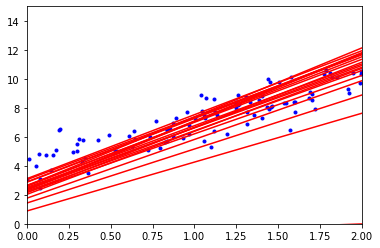

In [35]:
plt.plot(X, y, "b.")
for i in range(20):
    y_predict = X_new_b.dot(thetas[i])
    plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98489708]), array([3.12997194]))

## Polynomial Regression

In [41]:
m = 1000
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

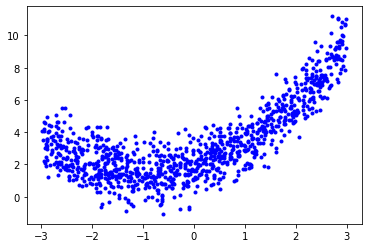

In [42]:
plt.plot(X, y, "b.")
plt.show()

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.01297157])

In [44]:
X_poly[0]

array([1.01297157, 1.0261114 ])

In [102]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.91012989]), array([[0.96123464, 0.51824359]]))

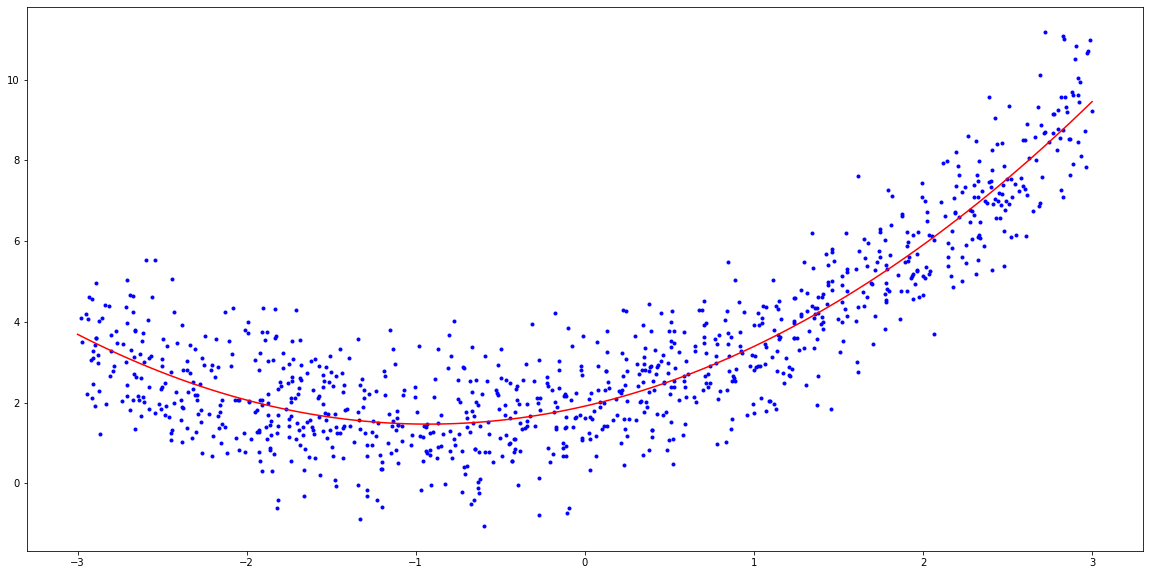

In [103]:
X_new = np.linspace(-3,3,100)
y_new = lin_reg.coef_[0][1]*X_new**2 + lin_reg.coef_[0][0]*X_new + lin_reg.intercept_[0]

fig=plt.figure(figsize=(20, 10))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt.show()

In [138]:
features_300 = PolynomialFeatures(degree=70, include_bias=False)
X_300 = features_300.fit_transform(X)

In [139]:
lin_reg = LinearRegression()
lin_reg.fit(X_300, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
y_new_300 =  lin_reg.intercept_[0]
X_new_300 = np.linspace(-3,3, 100)
for i in range(1, len(lin_reg.coef_[0])):
    y_new_300+= lin_reg.coef_[0][i] * X_new_300**i

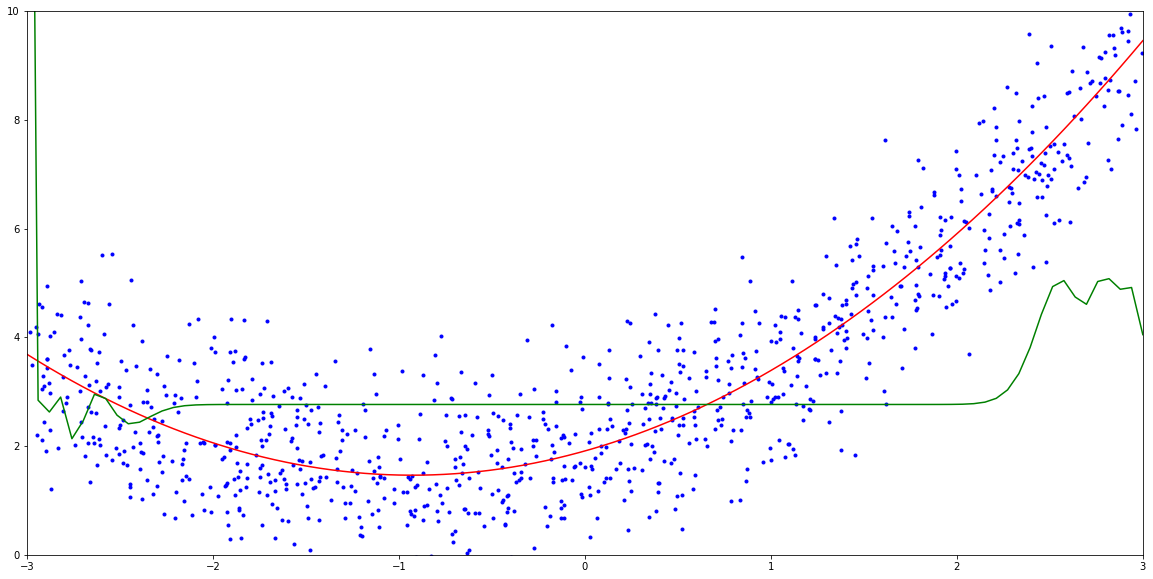

In [153]:
fig=plt.figure(figsize=(20, 10))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt.xlim(-3, 3)
plt.ylim(0, 10)
plt.plot(X_new_300, y_new_300, "g-")
plt.show()

In [121]:
y_new_300

array([617.11329651,   3.30319846,   3.30319846,   3.30319846,
         3.30319846,   3.30319846,   3.30319846,   3.30319846,
         3.30319846, -58.35688782])

### as we can see the 300^ is too complex and also didn't give correct requelts(other cases the 300^ will overfit the data), the best learner is ^2

## Plotting the learning curve for a model


In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    fig=plt.figure(figsize=(20, 10))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlim(0, 300)
    plt.ylim(0, 3)
    plt.legend()

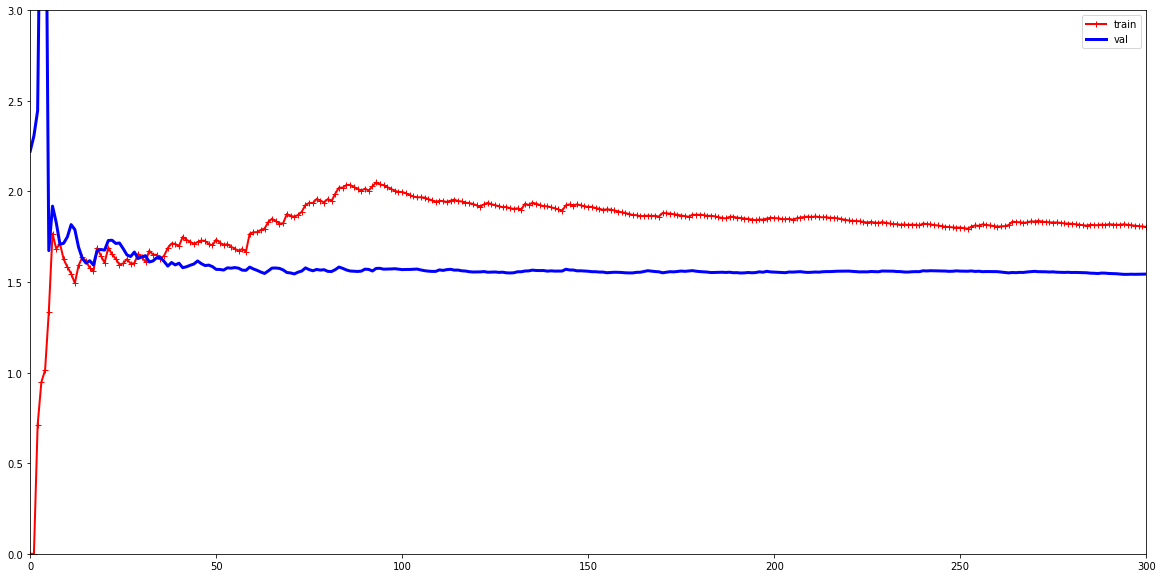

In [171]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)
plt.show()

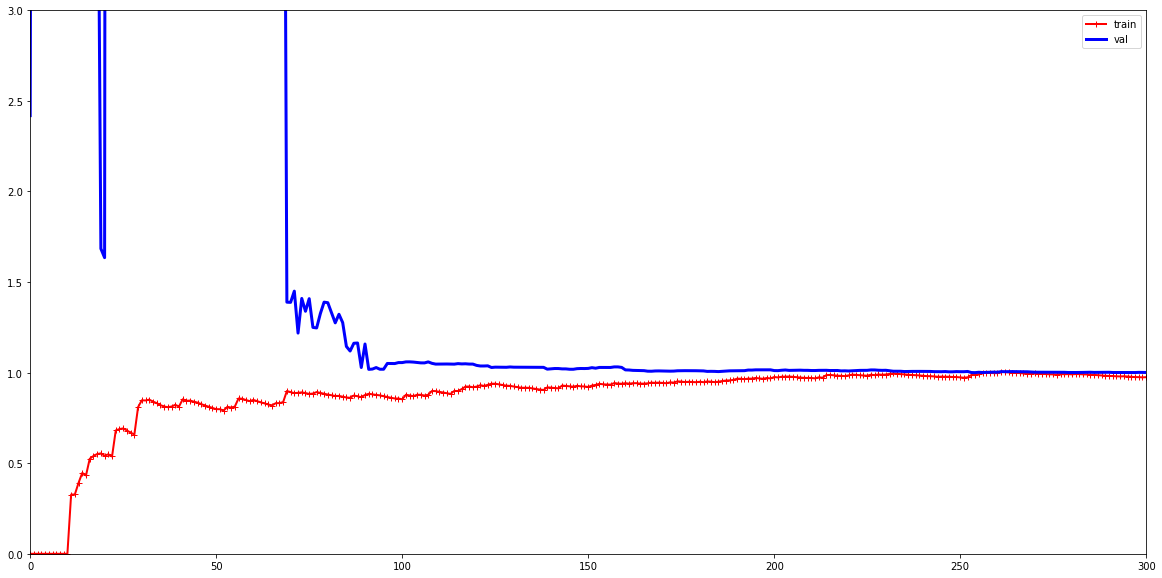

In [173]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

# Ridge regression

In [175]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.81236469]])

In [180]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.79418212])

## Lasso regression

In [181]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.75856906])

In [182]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.79737367])

## Elastic Net

In [183]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.76092654])

# Early stopping
### algorithms stops, when the validation error reaches to minimum

In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epock in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


In [222]:
best_epoch

49

In [223]:
best_model.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [224]:
best_model.predict([[1.5]])

array([2.32959283])